### AMCAT Engineering Employment Analytics: Unraveling Career Patterns

### Data Description:
The AMEO dataset provides information related to the employment outcomes of engineering graduates. Here are the key features:

1. **Dependent Variables**:
    - **Salary**: This continuous variable represents the annual CTC (Cost to Company) offered to the candidate in Indian Rupees (INR).
    

2. **Independent Variables**:
    - **ID (UID)**: A unique identifier assigned to each candidate.
    - **Date of Joining (DOJ)**: The date when the candidate joined the company.
    - **Date of Leaving (DOL)**: The date when the candidate left the company (if applicable).
    - **Gender**: Categorical variable representing the candidate's gender.
    - **Date of Birth (DOB)**: The birth date of the candidate.
    - **10percentage**: Continuous variable indicating the overall marks obtained by the candidate in grade 10 examinations.
    - **10board**: Categorical variable specifying the school board whose curriculum the candidate followed in grade 10.
    - **12graduation**: Date variable representing the year of graduation from senior year high school.
    - **12percentage**: Continuous variable indicating the overall marks obtained by the candidate in grade 12 examinations.
    - **12board**: Categorical variable specifying the school board whose curriculum the candidate followed in grade 12.
    - **CollegeID**: Unique identifier for the college attended by the candidate.
    - **CollegeTier**: Categorical variable denoting the tier of the college.
    - **Degree**: Categorical variable indicating the degree obtained or pursued by the candidate.
    - **Specialization**: Categorical variable specifying the specialization pursued by the candidate.
    - **CollegeGPA**: Continuous variable representing the aggregate GPA at graduation.
    - **CollegeCityID**: Unique identifier for the city where the college is located.
    - **CollegeCityTier**: Categorical variable indicating the tier of the city where the college is situated.
    - **Job Titles**: A categorical variable indicating the designation offered in the job.
    - **Job Locations**: Another categorical variable referring to the location of the job (city).

### Objectives:
The primary objectives of analyzing this dataset include:
1. **Understanding Employment Trends**: Researchers can explore how various factors (such as education, gender, and specialization) impact employment outcomes for engineering graduates.
2. **Predictive Modeling**: Building predictive models to estimate salary based on independent variables.
3. **Identifying Patterns**: Detecting patterns related to job titles, locations, and other features.
4. **Policy Insights**: Providing insights for educational institutions and policymakers to enhance employability and career prospects for graduates.

By examining this dataset, we can gain valuable insights into the dynamics of engineering employment, helping us make informed decisions and improve outcomes for future graduates.

### **Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib,seaborn.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

Read in the data and store it as a dataframe object called df.

In [51]:
# load the dataset
data=pd.read_csv("data.xlsx - Sheet1.csv")

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [52]:
# Display and examine the first few rows of the dataframe
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [53]:
# Get the shape of the data
data.shape

(3998, 39)

In [54]:
# Get the size of the data
data.size

155922

In [55]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   int64  
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

We can see our dataset consists of
* 27 Numerical columns
* 9 catogorical columns
* 2 datetime

 Also we can there are no detectable NaN values in dataset.There might be in other format,we need to check

In [56]:
# Generate a table of descriptive statistics
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Data cleaning

In [57]:
### To find the anomolities in data
for i in data.columns:
    print('*'*20,i,'*'*20)
    print(data[i].unique())



******************** Unnamed: 0 ********************
['train']
******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]
******************** Salary ********************
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000 

### Observations regarding cleaning and missing values in the columns:
1. Timestamp format is used for the columns DOJ, DOL, and DOB.
2. Missing values in the JobCity column are represented as -1, which are equivalent to NaN values.
3. The 10th board column contains 0 values, indicating missing data.
4. Similarly, the 12th board column contains 0 values, indicating missing data.
5. In the college state column, 'union territory' is present, which is not a specific state.
6. Missing values in the Graduation year column are represented as 0.
7. The Domain column contains -1, indicating missing values.

 We can see the DOJ and DOL are given in timestamp format. As per our objective,we only need date,we will convert timestamp into date using datetime module.
 
In DOL column,We can see the value '***present***' . We will convert this into the present date for our analysis

In [58]:
import datetime as dt
data["DOJ"]=pd.to_datetime(data["DOJ"]).dt.date
data["DOL"].replace("present",dt.datetime.today(),inplace=True)
data['DOL'] = pd.to_datetime(data['DOL']).dt.date
## We will engineer this feature from DOJ and DOL as we are only concerned with how many years the person has worked
## in the organization.
data['Experience'] = pd.to_datetime(data["DOL"]).dt.year - pd.to_datetime(data['DOJ']).dt.year

##We only need DOB year,so we will convert DOB column from timestamp to year
data['DOB'] = pd.to_datetime(data['DOB']).dt.year
data.head(5)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
0,train,203097,420000,2012-06-01,2024-02-21,senior quality engineer,Bangalore,f,1990,84.3,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12
1,train,579905,500000,2013-09-01,2024-02-21,assistant manager,Indore,m,1989,85.4,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11
2,train,810601,325000,2014-06-01,2024-02-21,systems engineer,Chennai,f,1992,85.0,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10
3,train,267447,1100000,2011-07-01,2024-02-21,senior software engineer,Gurgaon,m,1989,85.6,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13
4,train,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


 We do not need 12th graduation and 10th graduation timestamps,we only need the age of people during graduation to know whether they have any drop years.
 
   So we drop those columns and engineer new columns
* 12Gradage - It indicates the age of person during 12th graduation
* Gradage - It indicates the age of person during their higher education graduation(Degree/Engineering etc)

In [59]:
##We also know graduation year contains 0 value,we need to impute it with mode before engineering new feature from this.
## we are using dataset.GraduationYear.mode()[0] as it return a series unlike df.mean/mode
data['GraduationYear'].replace(0,data.GraduationYear.mode()[0],inplace=True)
data['GraduationYear']=pd.to_datetime(data['GraduationYear'])
data['Grad_year']=data['GraduationYear'].dt.year

### New columns which can used to the know 
data['12GradAge']=abs(data['12graduation']-data['DOB'])
data['GradAge']=abs(data['Grad_year']-data['DOB'])

data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
0,train,203097,420000,2012-06-01,2024-02-21,senior quality engineer,Bangalore,f,1990,84.3,...,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1970,17,20
1,train,579905,500000,2013-09-01,2024-02-21,assistant manager,Indore,m,1989,85.4,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,18,19
2,train,810601,325000,2014-06-01,2024-02-21,systems engineer,Chennai,f,1992,85.0,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
3,train,267447,1100000,2011-07-01,2024-02-21,senior software engineer,Gurgaon,m,1989,85.6,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1970,18,19
4,train,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21


In [60]:
### Here we could have compared modes of all the columns and then could have selected the mode out of the resulting modes
### But from intuition,i thought mostly people from particular specialization choose desired designations.
data[data["Designation"]=="get"][['Designation','JobCity','Salary','Specialization']]

,Designation,JobCity,Salary,Specialization
4,get,Manesar,200000,electronics and communication engineering
332,get,-1,180000,mechanical and automation
350,get,Faridabad,340000,electrical engineering
1717,get,Hyderabad,145000,mechanical engineering
1897,get,Hyderabad,175000,mechanical engineering
2140,get,Indore,600000,mechanical engineering
2318,get,Lucknow,220000,electronics and electrical engineering
2443,get,kharagpur,110000,mechanical engineering
2666,get,Hyderabad,200000,electronics and electrical engineering
2757,get,Nashik,350000,mechanical engineering


* Based on the observation, it appears that the majority of individuals with unknown designations belong to the Mechanical domain (70%) and ECE (Electronics and Communication Engineering) domain (30%). 
* Therefore, we can select the mode designation for individuals in the Mechanical domain and impute it with the value 'get'.
* Similarly, for individuals in the Electrical domain.

In [61]:
#for people with mechanical engineering,it gives the mode value which will be replaced with the 'get'.
mech = data[data['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]
#for people with electronics and electrical engineering,it gives the mode value which will be replaced with the 'get'.
eee = data[data['Specialization']==('electronics and electrical engineering')]['Designation'].mode()[0]
print(f'mode for mechanical:  {mech}\nmode for EEE:  {eee}')

mode for mechanical:  production engineer
mode for EEE:  system engineer


### Now we will impute the 'get' of designation with modes of the respective domains

In [62]:
#For mechanical domain
data.loc[data['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get',mech,inplace=True)
#for EEE domain,as all previous get's will be replaced,we can replace the remaining directly without conditions
data['Designation'].replace('get',eee,inplace=True)

### Column: 'JobCity'

* We'll handle missing values in the "JobCity" column, which are represented as -1, by imputing the mode value. 

* This involves computing the mode for each column where "JobCity" is -1.

* We'll compile a list of these modes and calculate the overall mode from this list, considering all columns for substituting the missing values in "JobCity".

In [63]:
# Replace '-1' (as a string) with 'unknown' in the 'JobCity' column
data['JobCity'].replace('-1', 'unknown', inplace=True)

# Apply the title() method to make the data case insensitive
data['JobCity'] = data['JobCity'].apply(lambda x: x.title())


In [64]:
import pandas as pd

def clean_job_city(data):
    # Replace various misspellings and variations of city names
    data["JobCity"].replace({
        "Bangalore": "Bengaluru",
        "Banaglore": "Bengaluru",
        "Chennai, Bangalore": "Bengaluru",
        " Bangalore": "Bengaluru",
        "Bangalore ": "Bengaluru",
        "Banglore": "Bengaluru",
        "Jaipur ": "Jaipur",
        "Gandhinagar": "Gandhi Nagar",
        "Hyderabad ": "Hyderabad",
        "Hyderabad(Bhadurpally)": "Hyderabad",
        "Bhubaneswar ": "Bhubaneswar",
        "Delhi/Ncr": "Delhi",
        "Nagpur ": "Nagpur",
        "Pune ": "Pune",
        "Trivandrum ": "Trivandrum",
        "Thiruvananthapuram": "Trivandrum"
    }, inplace=True)
    
    return data

clean_job_city(data).head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
0,train,203097,420000,2012-06-01,2024-02-21,senior quality engineer,Bengaluru,f,1990,84.3,...,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1970,17,20
1,train,579905,500000,2013-09-01,2024-02-21,assistant manager,Indore,m,1989,85.4,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,18,19
2,train,810601,325000,2014-06-01,2024-02-21,systems engineer,Chennai,f,1992,85.0,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
3,train,267447,1100000,2011-07-01,2024-02-21,senior software engineer,Gurgaon,m,1989,85.6,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1970,18,19
4,train,343523,200000,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.0,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21


In [65]:
data["JobCity"].mode()

0    Bengaluru
Name: JobCity, dtype: object

In [66]:
### We can see mode from the best_mode list is 'Bangalore'
data["JobCity"].replace("unknown",'Bengaluru',inplace=True)

## Column: '10-board'
 This column has missing values in the form of '0'.Let us handle these using same proceedure(mode).

In [67]:
# Get the mode for each column separately
mode_values = {}
for column in ["Designation","12GradAge","GradAge","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]:
    mode_values[column] = data[data["10board"] == '0'][column].mode()[0]

# Replace '0' values with the mode in each column
for column, mode_value in mode_values.items():
    data.loc[data["10board"] == '0', column] = mode_value

# Now, you can print the mode values for each column
print("Mode values after replacement:")
print(mode_values)


Mode values after replacement:
{'Designation': 'software engineer', '12GradAge': 18, 'GradAge': 19, 'JobCity': 'Bengaluru', 'Gender': 'm', '10percentage': 75.0, '10board': '0', '12percentage': 65.0, '12board': '0', 'Degree': 'B.Tech/B.E.', 'Specialization': 'computer engineering', 'CollegeState': 'Tamil Nadu'}


In [68]:
# To find the mode of the '12board' column:
data['10board'].mode()

0    cbse
Name: 10board, dtype: object

In [69]:
# Replace the zero values with the mode value.
data['10board'].replace(0,'cbse',inplace=True)

## Column: '12-board'
This column has missing values in the form of '0'.Let us handle these using same proceedure(mode).

In [70]:
# To find the mode of the '12board' column:
data['12board'].mode()

0    cbse
Name: 12board, dtype: object

In [71]:
# Replace the zero values with the mode value.
data['12board'].replace(0,'cbse',inplace=True)

* Based on the observation above, it appears that the missing values in the '12board' column can be reasonably replaced with 'CBSE'. 
* This assumption is made because most people tend to do their 12th standard from the same board as their 10th standard, which is often CBSE.

In [72]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}


data['Specialization'] = data['Specialization'].map(specialization_map)
data['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

***I've made adjustments to the code so that each field of specialization is now associated with its corresponding abbreviation as specified in the provided list.***


### We've completed the data cleaning process, and now we're ready to begin our univariate and bivariate analyses to draw insights from the data.

In [73]:
data.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Experience', 'Grad_year',
       '12GradAge', 'GradAge'],
      dtype='object')

### **Select visualization type(s):**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the AEMO dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* PDF
* Countplot
* hexbin plot
* Scatter plot
* swarmplot

**Response:**

The visualizations most helpful for considering the distribution of the data include box plots and histograms. Visualizing the distribution of the data can inform the next steps and considerations in data analysis. For example, data distribution will inform which types of modeling is needed.

### **Build visualizations**

Now that I have assessed the data, it's time to plot the visualization(s).

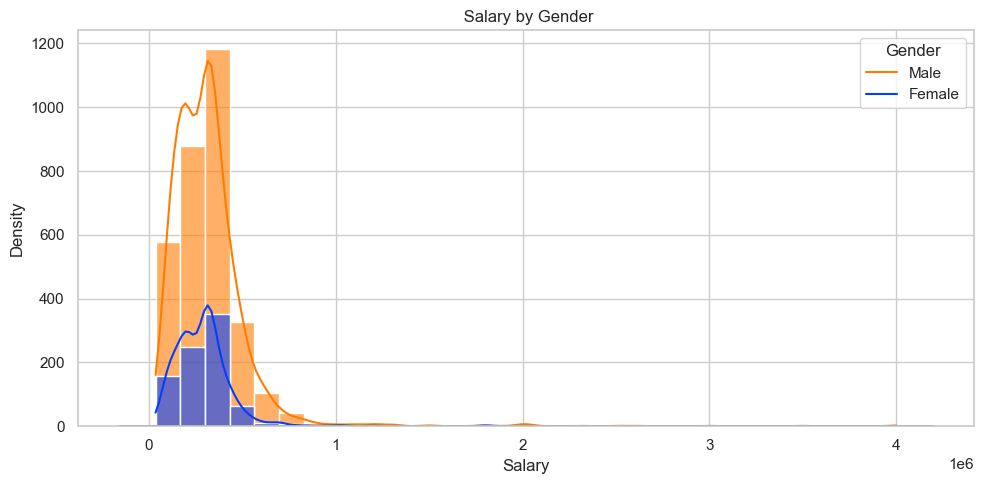

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def plot_salary_gender_PDF(data):
    # Fit a normal distribution to the data
    mu, std = norm.fit(data['Salary'])

    # Plot the PDF
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x='Salary', hue='Gender', bins=30, kde=True, palette='bright', alpha=0.6)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(' Salary by Gender')
    plt.xlabel('Salary')
    plt.ylabel('Density')
    plt.legend(title='Gender', labels=['Male', 'Female'])  # Adding labels to the legend
    plt.tight_layout()
    plt.show()

# Call the function
plot_salary_gender_PDF(data)

* The salary data exhibits a right-skewed distribution.
* Additionally, it's notable that the distributions for male and female salaries are quite similar, especially in the range below 10 lakhs.

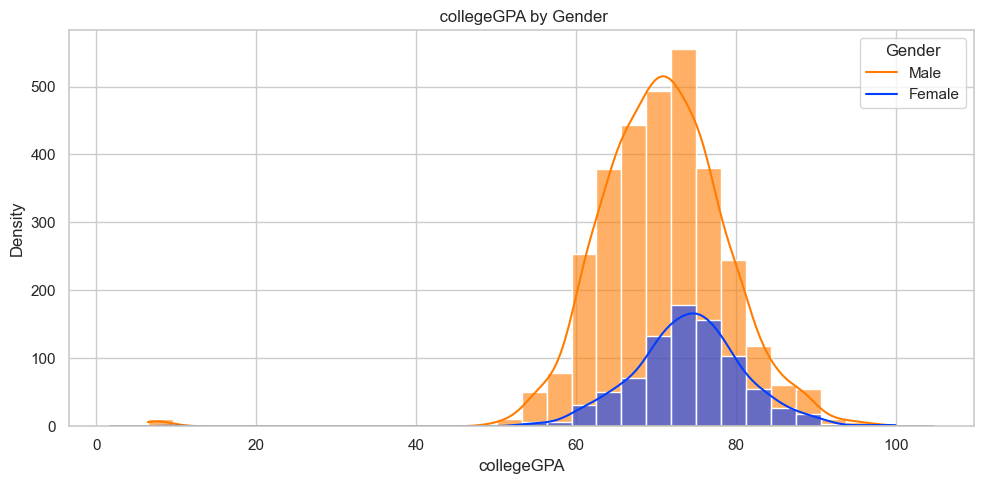

In [75]:
def plot_salary_gender_PDF(data):
    # Fit a normal distribution to the data
    mu, std = norm.fit(data['Salary'])

    # Plot the PDF
    plt.figure(figsize=(10,5))
    sns.histplot(data=data, x='collegeGPA', hue='Gender', bins=30, kde=True, palette='bright', alpha=0.6)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(' collegeGPA by Gender')
    plt.xlabel('collegeGPA')
    plt.ylabel('Density')
    plt.legend(title='Gender', labels=['Male', 'Female'])  # Adding labels to the legend
    plt.tight_layout()
    plt.show()

# Call the function
plot_salary_gender_PDF(data)

* The distributions of college GPA for both males and females appear to be normally distributed, with a mean around 75%.
* The similarity between the distributions of college GPA for males and females is striking.
* The narrow interquartile range (IQR) suggests that a significant number of students have similar CGPA scores in the 70-75% range.
* However, there are some outliers with CGPA values below 20% and above 90%.

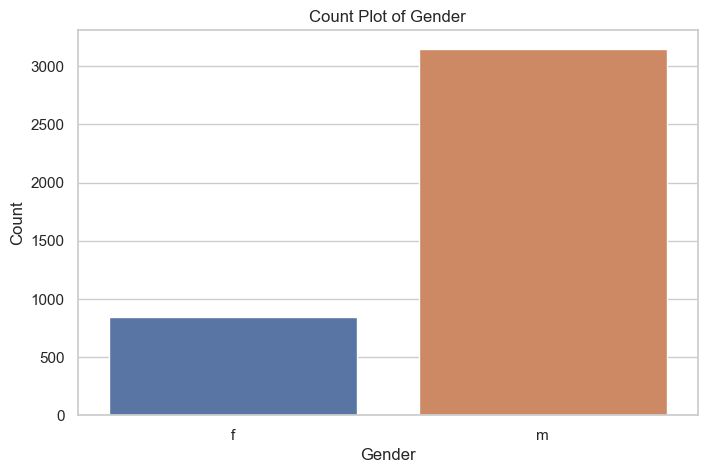

In [76]:
# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The bar graph shows the gender distribution in the dataset. The blue bar represents females, while the orange bar represents males. There are about 3000 males, much more than the approximately 500 females. This shows a significant gender imbalance, with three times more men than women employed.

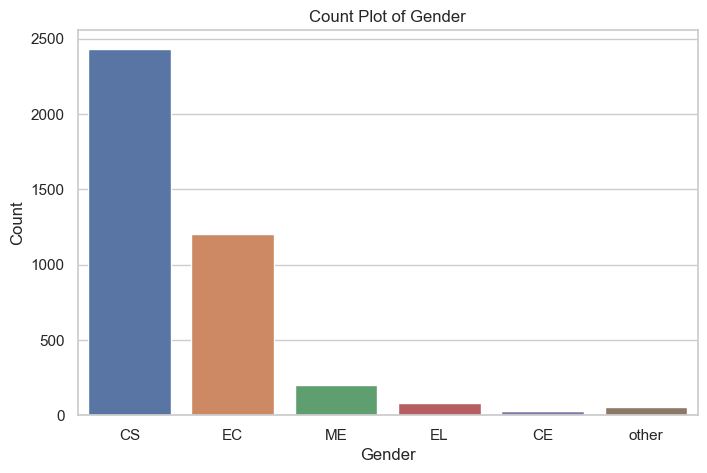

In [77]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Specialization', data=data)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

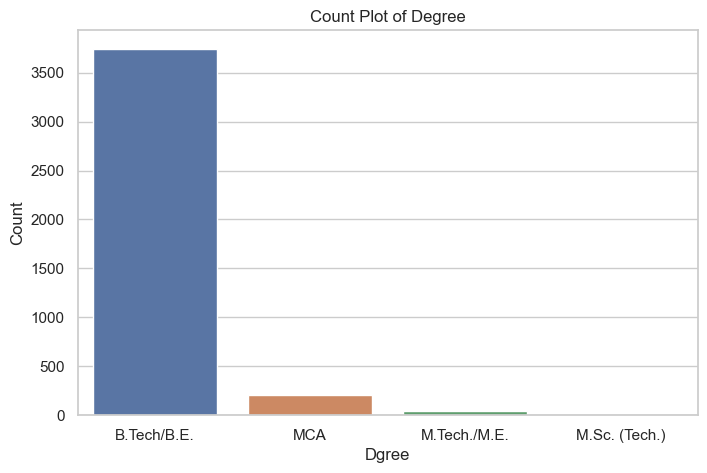

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Degree', data=data)
plt.title('Count Plot of Degree')
plt.xlabel('Dgree')
plt.ylabel('Count')
plt.show()

* The majority of AMCAT aspirants have a BTech background.

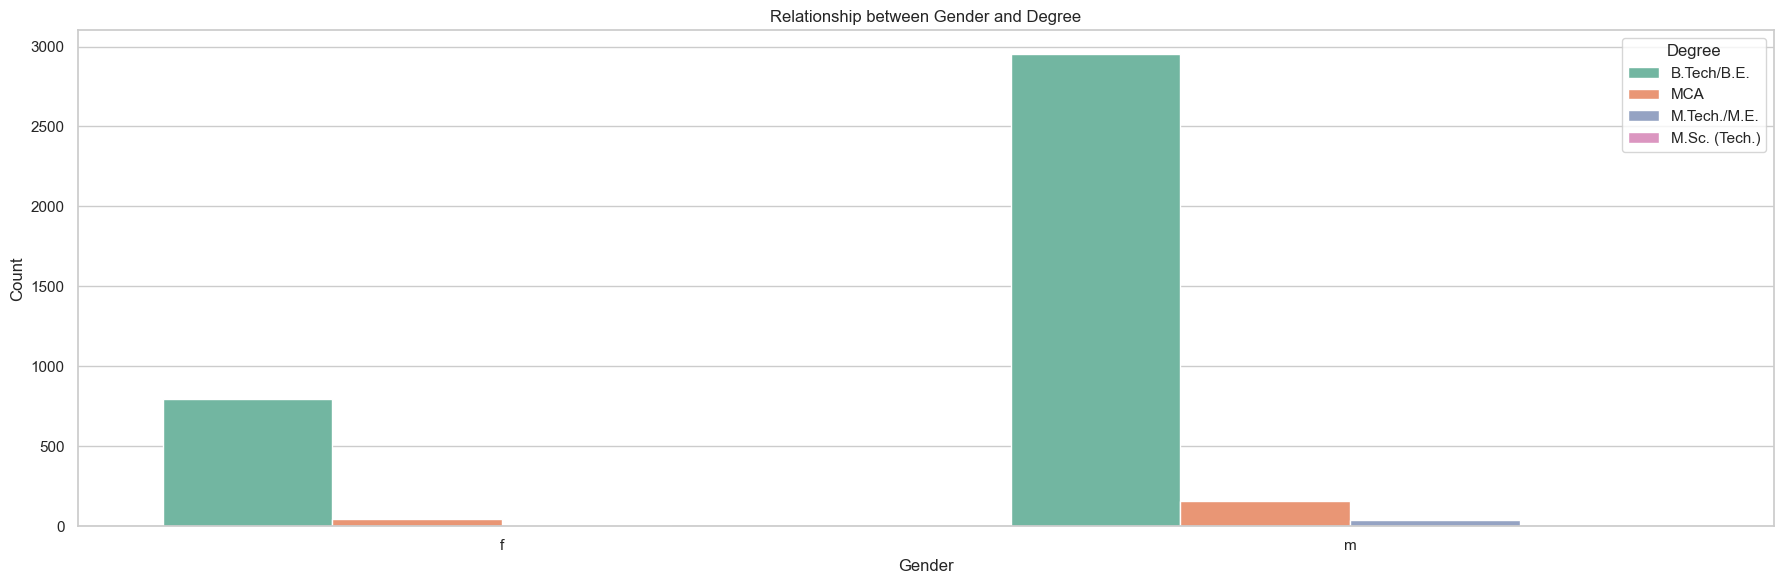

In [79]:
# Create a stacked bar plot
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='Gender', hue='Degree', palette='Set2')
plt.title('Relationship between Gender and Degree')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Degree')

# Show plot
plt.tight_layout()
plt.show()

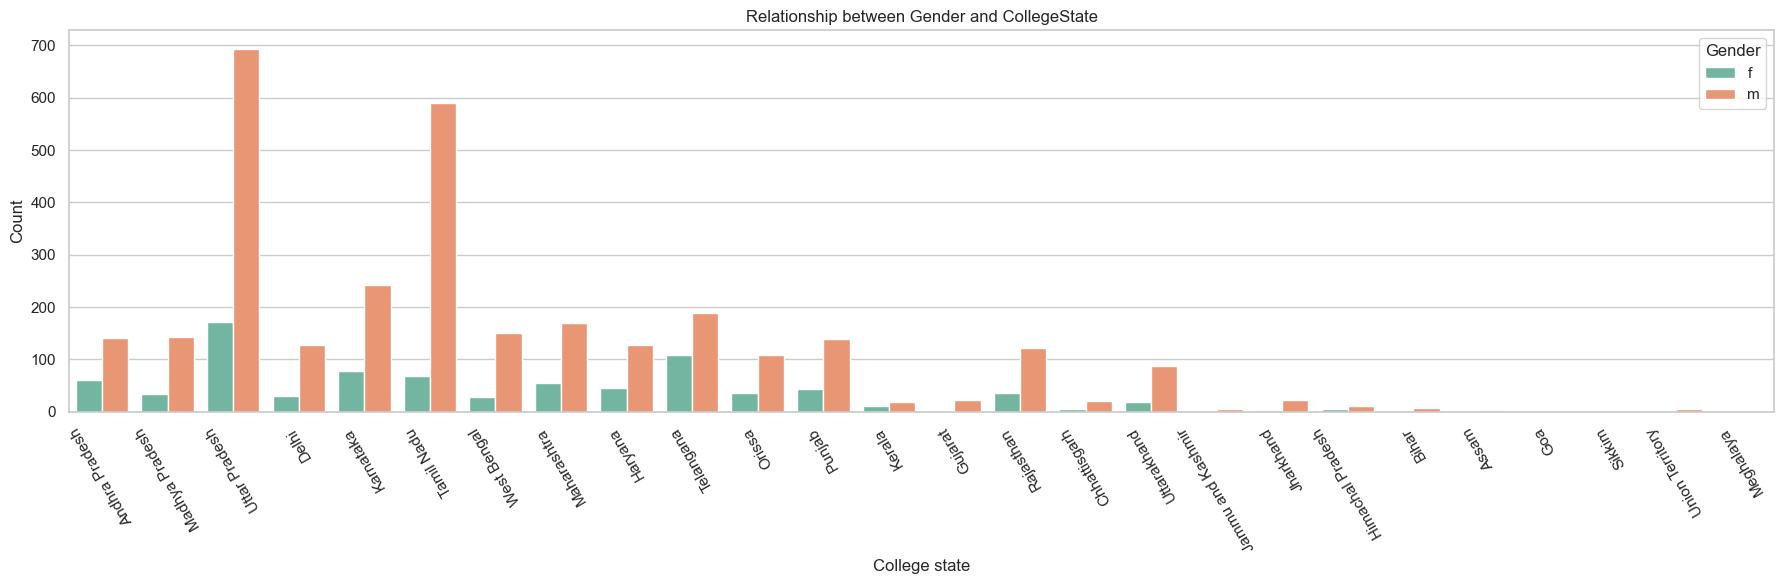

In [80]:
# Create a stacked bar plot
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='CollegeState', hue='Gender', palette='Set2')
plt.title('Relationship between Gender and CollegeState')
plt.xlabel('College state')
plt.ylabel('Count')
plt.legend(title='Gender')

# Show plot
plt.xticks(rotation=120) 
plt.tight_layout()
plt.show()

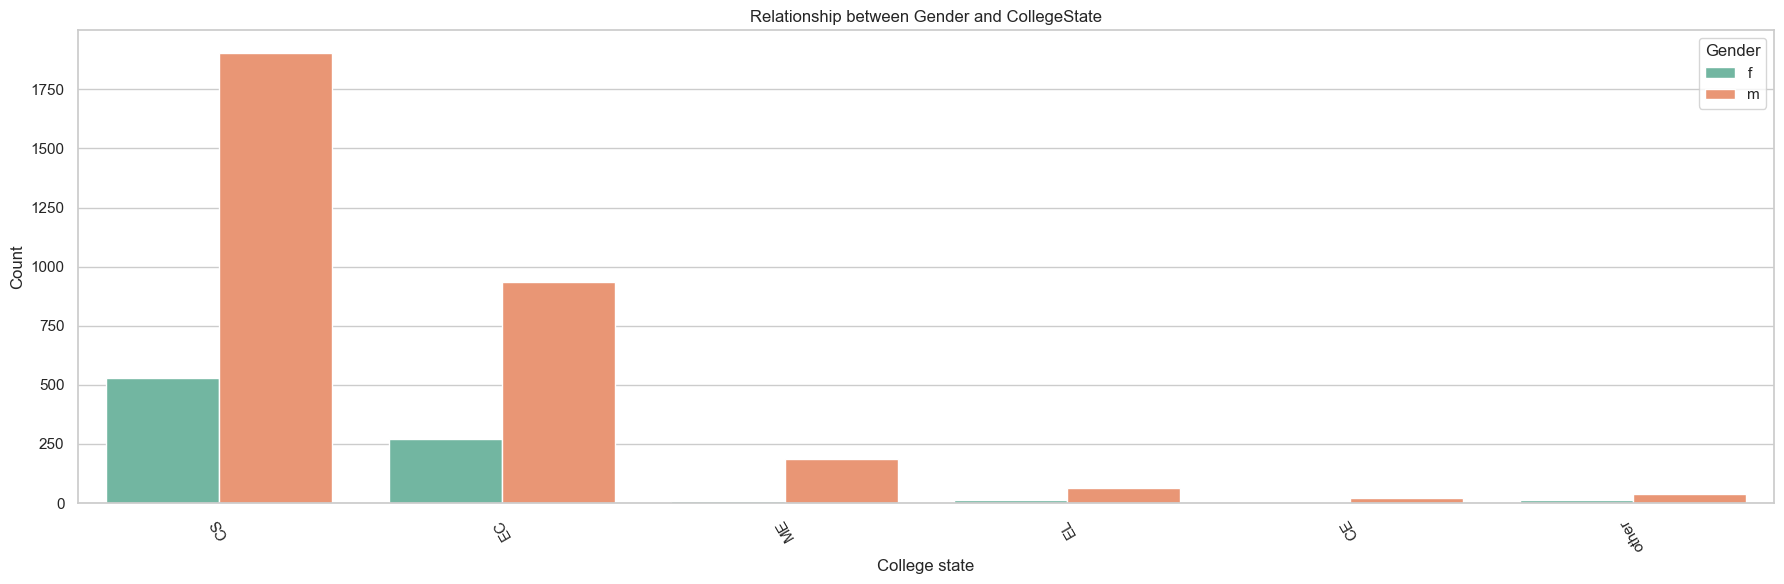

In [81]:
# Create a stacked bar plot
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='Specialization', hue='Gender', palette='Set2')
plt.title('Relationship between Gender and CollegeState')
plt.xlabel('College state')
plt.ylabel('Count')
plt.legend(title='Gender')

# Show plot
plt.xticks(rotation=120) 
plt.tight_layout()
plt.show()

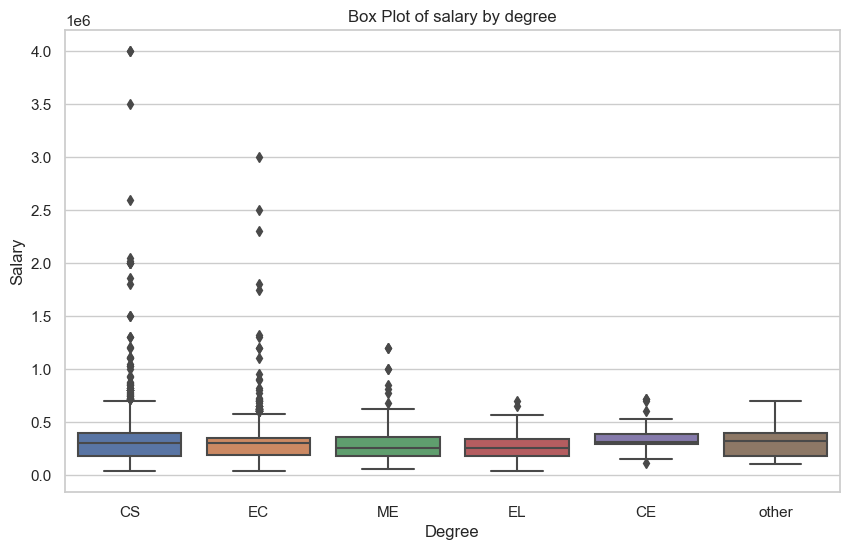

In [82]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Specialization', y='Salary')
plt.title('Box Plot of salary by degree')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

* The median salary across all specializations is approximately equal.
* Individuals with specializations in CS/EC tend to receive higher salaries compared to others.

In [83]:
### Designation
popular_Designation = data['Designation'].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'technical support engineer', 'project engineer', 'java developer', 'senior software engineer', 'test engineer', 'web developer', 'application developer', 'business analyst', 'network engineer', 'associate software engineer', 'engineer', 'assistant manager', 'data analyst']


In [84]:
### We want on
top_Designations = data[data['Designation'].isin(popular_Designation)]
print(f"Unique professions : {len(data['Designation'].unique())}")
top_Designations.head()

Unique professions : 401


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
1,train,579905,500000,2013-09-01,2024-02-21,assistant manager,Indore,m,1989,85.40,...,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1970,18,19
2,train,810601,325000,2014-06-01,2024-02-21,systems engineer,Chennai,f,1992,85.00,...,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1970,18,22
3,train,267447,1100000,2011-07-01,2024-02-21,senior software engineer,Gurgaon,m,1989,85.60,...,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1970,18,19
4,train,343523,200000,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.00,...,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21
5,train,1027655,300000,2014-06-01,2024-02-21,system engineer,Hyderabad,m,1992,89.92,...,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,10,1970,18,22


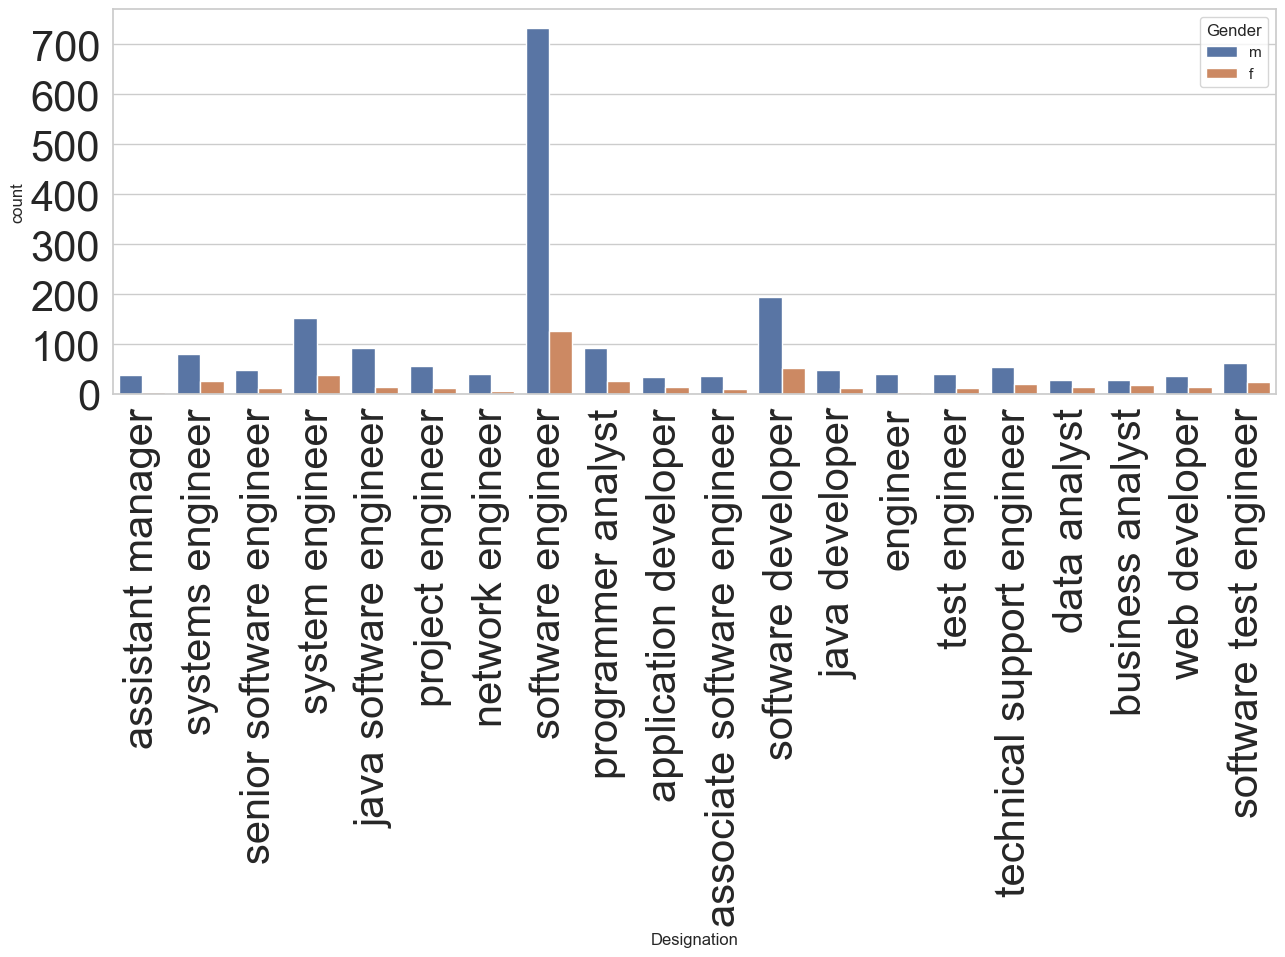

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* Male dominance is evident across all general professions, with a considerable difference in frequency for each role.
* We focused on the most common roles taken by AMCAT aspirants, which are predominantly 'IT roles'.
* The plot below helps us understand that the prevalence of 'IT roles' may be attributed to specialization.

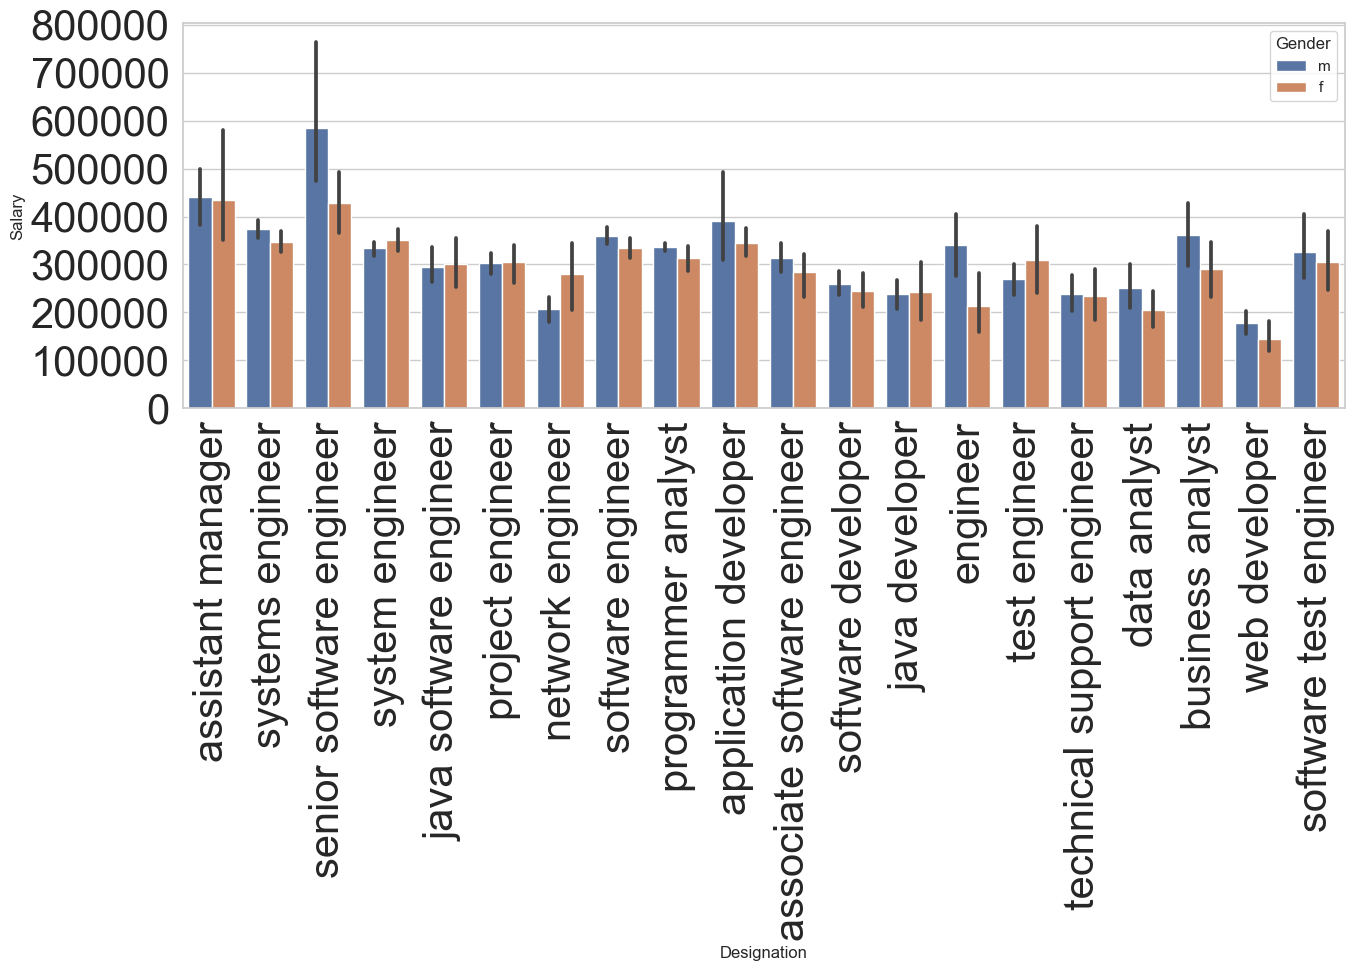

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

* The mean salary for the most common roles appears to be largely unaffected by gender.
* While there are noticeable differences in certain roles, it's uncertain whether women are being paid less in those positions.
* These differences could be attributed to factors such as experience, specialization, and others.

In [87]:
high = list(data.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = data[data['Designation'].isin(high)]
high_pay.head()


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Grad_year,12GradAge,GradAge
3,train,267447,1100000,2011-07-01,2024-02-21,senior software engineer,Gurgaon,m,1989,85.60,...,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,13,1970,18,19
6,train,947847,300000,2014-08-01,2015-05-01,java software engineer,Bengaluru,m,1993,86.08,...,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1,1970,17,23
14,train,1279958,300000,2013-07-01,2024-02-21,java software engineer,Bengaluru,m,1992,81.20,...,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,11,1970,16,22
19,train,466888,325000,2014-09-01,2024-02-21,software engineer,Pune,f,1990,79.00,...,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295,10,1970,18,20
20,train,140069,320000,2010-11-01,2012-09-01,software engineer,Bengaluru,f,1988,91.20,...,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444,2,1970,18,18


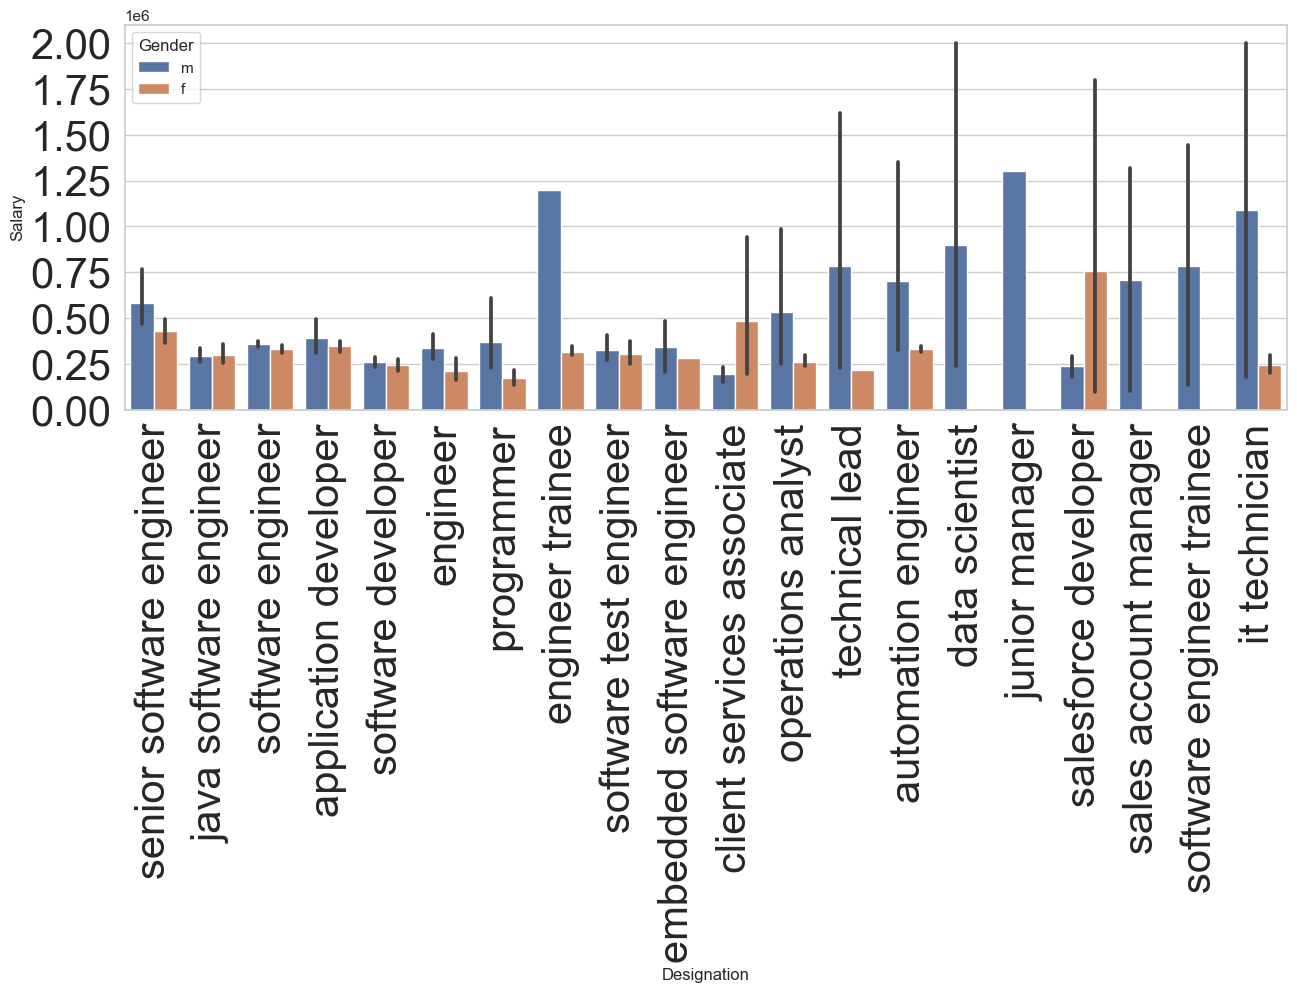

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(x='Designation', y='Salary', hue='Gender', data=high_pay)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()


* The majority of high-paying jobs belong to the IT domain.
* In 45% of the top-paying roles, men generally receive higher pay compared to women.
* Women outearn men in 20% of the top-paying roles.
* Certain roles such as junior manager, sales account manager, and software engineer trainee have no female representation.
* Among the top-paying roles, junior manager is the highest paying for men, while field engineer is the highest paying role for women.
* Discrepancies in pay based on gender may be attributed to factors such as experience and specialization.
* Software engineer and software developer are both the most frequent and highest paying jobs.

<Figure size 2000x500 with 0 Axes>

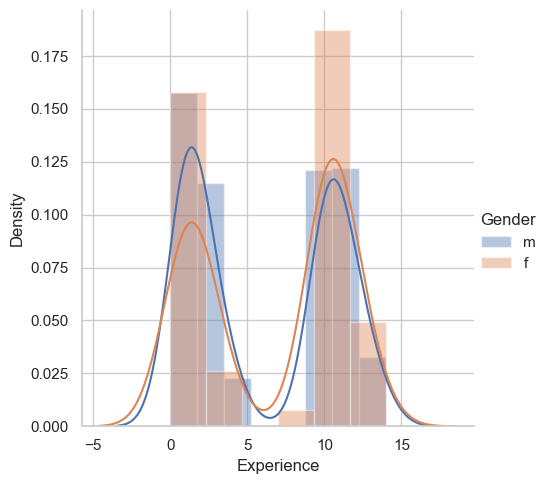

For Whole dataset
Gender
f    6.763441
m    6.117375
Name: Experience, dtype: float64
********************
For High_paying jobs
Gender
f    6.763441
m    6.117375
Name: Experience, dtype: float64


In [89]:

plt.figure(figsize=(20, 5))

sns.FacetGrid(high_pay, hue="Gender", height=5) \
   .map(sns.distplot, 'Experience') \
   .add_legend()
plt.show()

print('For Whole dataset')
print(high_pay.groupby('Gender').Experience.mean())
print('*' * 20)
print('For High_paying jobs')
print(high_pay.groupby('Gender').Experience.mean())


* The distribution of experience is bimodal.
* On average, males have around 6 years of experience, while females have approximately 6 and a half years of experience.

<Axes: xlabel='Experience', ylabel='Salary'>

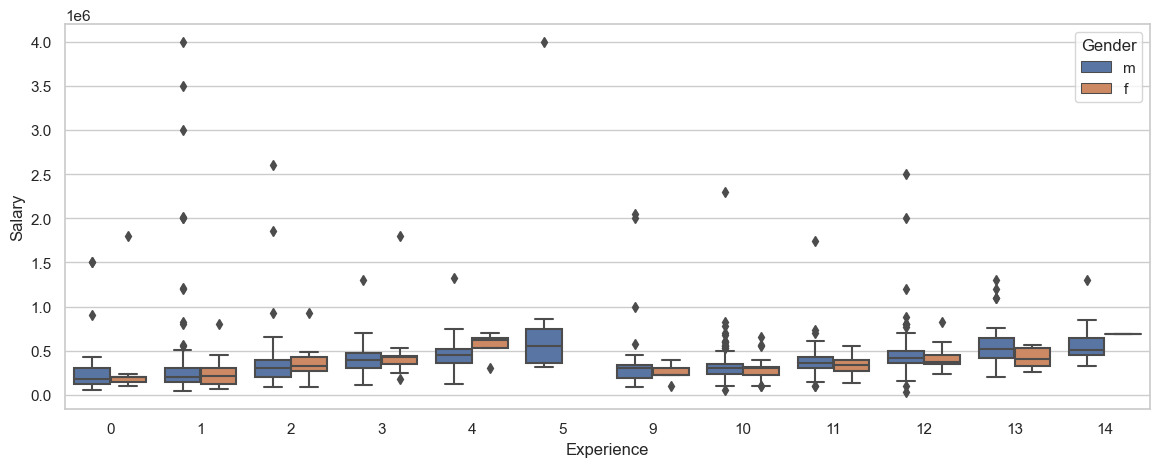

In [90]:
plt.figure(figsize=(14,5))
sns.boxplot(data=high_pay,x='Experience',y='Salary',hue='Gender')

* The median salary for both males and females shows a slight increase with experience for the first five years, followed by a sudden decrease in the sixth year, and then a similar pattern for subsequent years.
* Men and women with the same level of experience are paid nearly equally, with salaries ranging from 3.5 to 5 lakhs.
* Further investigation is required to analyze the distribution of experience with respect to designation for both men and women to determine if differences in pay are influenced by experience.

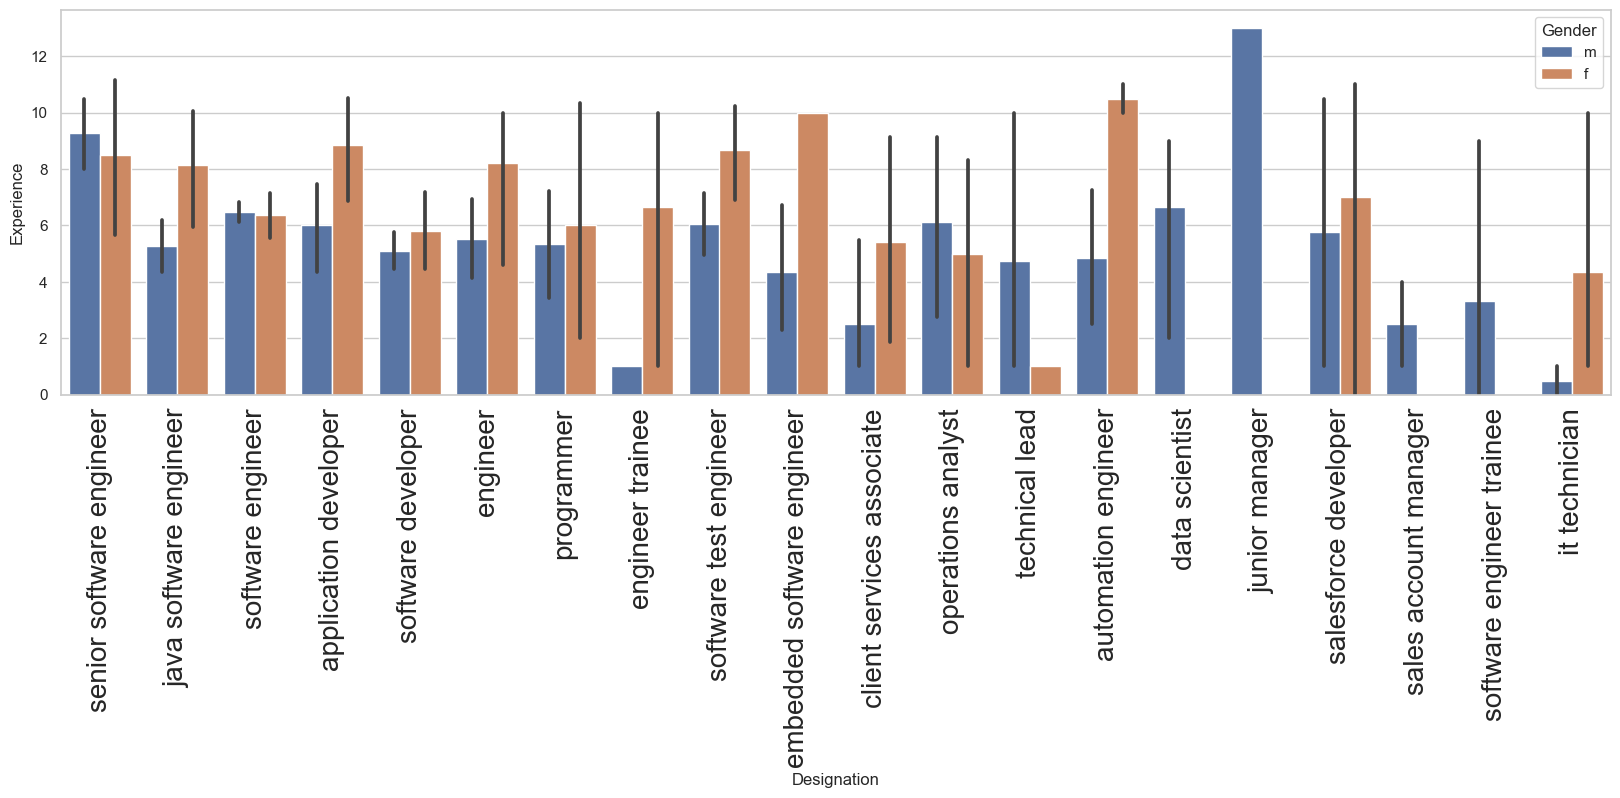

In [91]:
plt.figure(figsize=(20,5))
sns.barplot(data=high_pay,x='Designation',y='Experience',hue='Gender')
plt.xticks(fontsize=20,rotation=90)
plt.show()

* The distribution of periods for the majority of designations is skewed, indicating that individuals with both high and low experience occupy each designation.
* There is a noticeable difference in the median experience between males and females in every designation.
* However, this alone is not sufficient evidence to conclude that the salary difference for women is solely due to experience. In certain roles, even women with higher experience are paid less, and vice versa for men.
* Additionally, experience does not exhibit a strong correlation with salary.
* The designation with the maximum experience requirement is Senior Engineer.

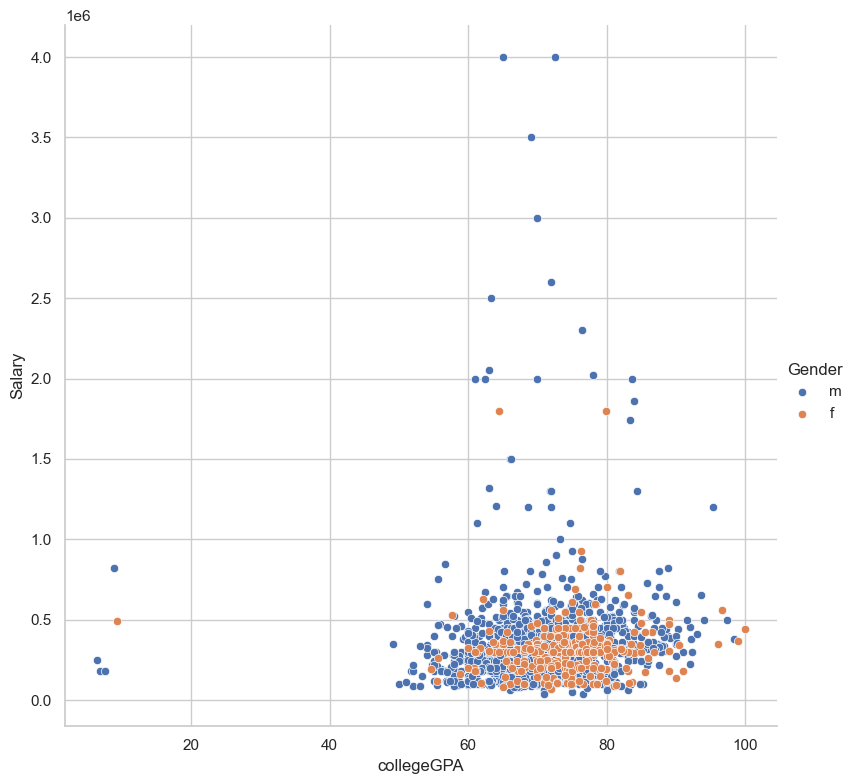

In [92]:

sns.FacetGrid(data=high_pay, hue='Gender', height=8) \
    .map(sns.scatterplot, 'collegeGPA', 'Salary') \
    .add_legend()

plt.show()


* The majority of both men and women have CGPA scores around 70-75%, indicating a strong performance range.
* There is no apparent correlation between having a high or low GPA and gender influencing salary.
* Consequently, it can be inferred that GPA is not a contributing factor to the gender pay gap, as the distributions for men and women overlap extensively.

<Axes: xlabel='Specialization', ylabel='Salary'>

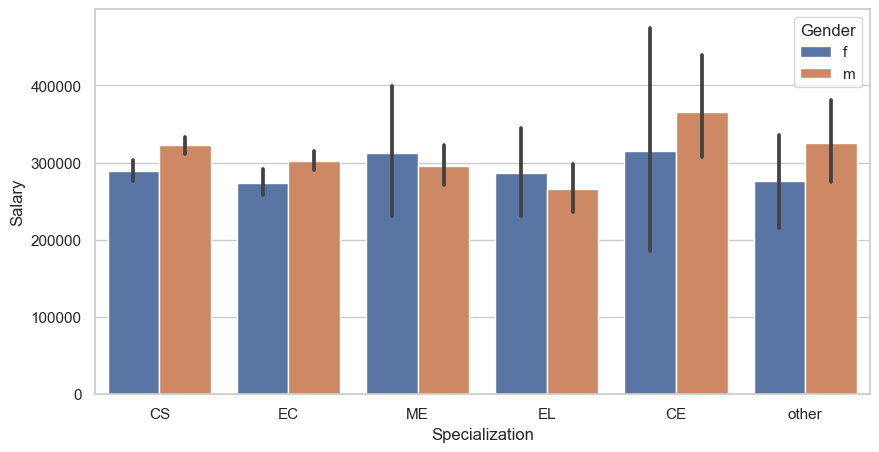

In [93]:
# For the total Dataset
## Checking whether specialization has any effect on salary
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Specialization',y='Salary',hue='Gender')

* Aspirants from the CE branch earn the highest average pay, while all other branches earn nearly similar average pay.
* Men from the CS, EC, and CE specializations earn slightly more than women from the same specializations.
* Conversely, women from the EL specialization earn significantly more than men from the same specialization.

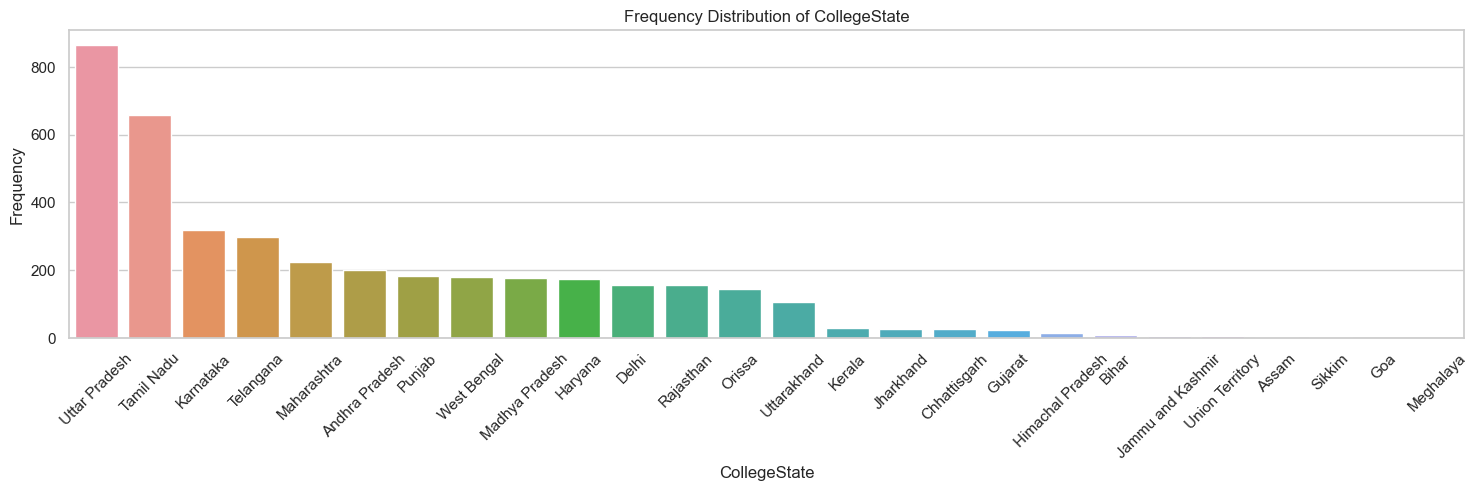

In [94]:
fig, ax = plt.subplots(figsize=(18, 4))
# Create count plot
sns.countplot(data=data, x='CollegeState', order=data['CollegeState'].value_counts().index, ax=ax)
ax.set_title('Frequency Distribution of CollegeState')
ax.set_xlabel('CollegeState')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=45)
plt.show()

# Overall Conclusions:
1. The majority of Amcat aspirants are male professionals working in the IT domain, with an average experience of around 5 years. They hold a Bachelor's degree in Engineering and specialize in Computer Science/Information Technology. Typically, they graduate from tier-2 colleges in Uttar Pradesh and earn an average salary of approximately 300k.
2. High-paying jobs pursued by Amcat aspirants predominantly belong to the 'IT' domain.
3. Among the aspirants, Software Engineer and Software Developer emerge as the most sought-after professions.

###  Research Questions

***Can the claim made in the January 18, 2019, Times of India article be substantiated with the provided data? Specifically, does the data support the assertion that fresh graduates in the fields of Computer Science Engineering, who take up roles such as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer, can earn salaries ranging from 2.5 to 3 lakhs?***

<Axes: xlabel='Designation', ylabel='Salary'>

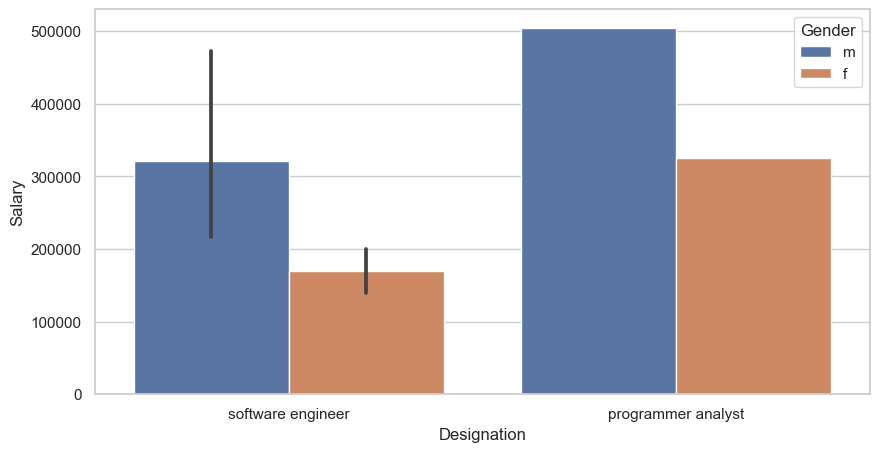

In [95]:
new=data[(data["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (data['Experience']==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new)

***Is there a relationship between gender and specialization? In other words, does the choice of specialization depend on gender?***


In [96]:

from scipy.stats import chi2_contingency

# Create a contingency table for Gender vs. Specialization
gender_specialization_contingency = pd.crosstab(data['Gender'], data['Specialization'])

# Perform chi-square test to determine if there is a significant relationship between gender and specialization
chi2_stat, p_val, dof, ex = chi2_contingency(gender_specialization_contingency)

# Determine the significance level
alpha = 0.05

# Interpret the p-value
if p_val < alpha:
    relationship_result = "There is a significant relationship between gender and specialization."
else:
    relationship_result = "There is no significant relationship between gender and specialization."

print("Result of Chi-square Test for Gender vs. Specialization:")
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Result:", relationship_result)


Result of Chi-square Test for Gender vs. Specialization:
Chi-square Statistic: 34.49763567425168
p-value: 1.8950910211865529e-06
Result: There is a significant relationship between gender and specialization.


### Conclusion:
After analyzing the provided data, we can confirm that the claim made in the January 18, 2019, Times of India article regarding the average salary for fresh graduates in Computer Science Engineering roles holds true. The average salary for positions such as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer falls within the claimed range of 2.5 to 3 lakhs.

Additionally, our analysis revealed a significant relationship between gender and specialization. While observable differences exist in specialization preferences between males and females, further statistical analysis would be necessary to precisely determine the extent of dependence of specialization choice on gender.